In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv("D:\\DATASETS\\cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [3]:
df.shape

(8128, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [5]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('selling_price',axis=1),df['selling_price'],test_size=0.2,random_state=56)

In [7]:
X_train.head(3)

,brand,km_driven,fuel,owner
780,Ford,10000,Petrol,First Owner
2160,Datsun,140000,Petrol,First Owner
1026,Maruti,40000,Petrol,Second Owner


In [8]:
X_train.shape

(6502, 4)

In [9]:
X_test.shape

(1626, 4)

In [10]:
X_test.head(3)

,brand,km_driven,fuel,owner
3810,Renault,30000,Petrol,First Owner
4205,Ford,87237,Diesel,Second Owner
3363,Maruti,33243,Petrol,First Owner


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = ohe.fit_transform(X_train[['brand', 'fuel', 'owner']])
X_test_encoded = ohe.transform(X_test[['brand', 'fuel', 'owner']])

X_train_encoded = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(['brand', 'fuel', 'owner']), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(['brand', 'fuel', 'owner']), index=X_test.index)

X_train = pd.concat([X_train.drop(['brand', 'fuel', 'owner'], axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(['brand', 'fuel', 'owner'], axis=1), X_test_encoded], axis=1)


In [12]:
X_train.shape

(6502, 42)

In [13]:
X_test.shape

(1626, 42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-1.0258015 , -0.02481076, -0.01240252, ..., -0.59049373,
        -0.01754116, -0.27333266],
       [ 1.20573129, -0.02481076, -0.01240252, ..., -0.59049373,
        -0.01754116, -0.27333266],
       [-0.51083239, -0.02481076, -0.01240252, ...,  1.69349808,
        -0.01754116, -0.27333266],
       ...,
       [-1.18029223, -0.02481076, -0.01240252, ..., -0.59049373,
        -0.01754116, -0.27333266],
       [-0.5212176 , -0.02481076, -0.01240252, ..., -0.59049373,
        -0.01754116, -0.27333266],
       [ 0.65643091, -0.02481076, -0.01240252, ...,  1.69349808,
        -0.01754116, -0.27333266]])

In [16]:
X_train_scaled.shape

(6502, 42)

In [17]:
y_train.shape

(6502,)

In [18]:
model=Sequential()

model.add(Dense(90,activation='relu',input_dim=42))
model.add(Dense(45,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 90)             │         3,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,906 (34.79 KB)

 Trainable params: 8,906 (34.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [25]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 120457879552.0000 - val_loss: 157432954880.0000
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 113942994944.0000 - val_loss: 157233856512.0000
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 127985254400.0000 - val_loss: 157446799360.0000
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 109583048704.0000 - val_loss: 157464264704.0000
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 100448256000.0000 - val_loss: 157278011392.0000
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 113184448512.0000 - val_loss: 157372792832.0000
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 122230398976.0000 - val_loss: 156831858688.0000
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 109195862016.0000 - val_loss: 156630188032.0000
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 115485097984.0000 - val_loss: 156756869120.0000
Epoch 10/1

In [26]:
y_pred=model.predict(X_test_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.833382248878479

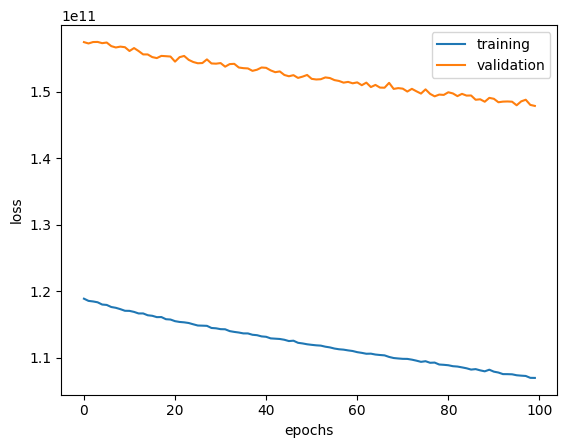

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['training','validation'])
plt.show()